# PREDICTIVE MODELING WITH MULTIPLE LR

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df= pd.read_csv("CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(200, 26)

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.880000,98.49800,173.680500,65.833500,53.680500,2542.995000,126.375000,3.323350,3.258200,10.098600,103.58000,5121.250000,25.325000,30.880000,13096.278335
std,57.879185,1.226016,5.86665,12.264967,2.118957,2.457574,520.781501,41.977194,0.266971,0.315891,3.913718,39.76885,480.693529,6.571552,6.917722,7997.436540
min,1.000000,-2.000000,86.60000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.00000,4150.000000,13.000000,16.000000,5118.000000
25%,50.750000,0.000000,94.50000,166.300000,64.000000,52.000000,2143.750000,97.000000,3.150000,3.110000,8.500000,70.00000,4800.000000,19.000000,25.000000,7775.000000
50%,100.500000,1.000000,96.75000,173.000000,65.450000,54.000000,2410.000000,110.500000,3.310000,3.290000,9.000000,95.00000,5150.000000,24.500000,30.000000,10096.500000
75%,150.250000,2.000000,101.20000,180.225000,66.500000,55.525000,2910.500000,141.000000,3.580000,3.410000,9.400000,116.00000,5500.000000,30.000000,36.000000,16106.000000
max,200.000000,3.000000,120.90000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.00000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            200 non-null    int64  
 1   symboling         200 non-null    int64  
 2   CarName           200 non-null    object 
 3   fueltype          200 non-null    object 
 4   aspiration        200 non-null    object 
 5   doornumber        200 non-null    object 
 6   carbody           200 non-null    object 
 7   drivewheel        200 non-null    object 
 8   enginelocation    200 non-null    object 
 9   wheelbase         200 non-null    float64
 10  carlength         200 non-null    float64
 11  carwidth          200 non-null    float64
 12  carheight         200 non-null    float64
 13  curbweight        200 non-null    int64  
 14  enginetype        200 non-null    object 
 15  cylindernumber    200 non-null    object 
 16  enginesize        200 non-null    int64  
 1

In [7]:
# dropping the values which are not neccessary 
df.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# after dropping 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          200 non-null    object 
 1   aspiration        200 non-null    object 
 2   doornumber        200 non-null    object 
 3   carbody           200 non-null    object 
 4   drivewheel        200 non-null    object 
 5   enginelocation    200 non-null    object 
 6   wheelbase         200 non-null    float64
 7   carlength         200 non-null    float64
 8   carwidth          200 non-null    float64
 9   carheight         200 non-null    float64
 10  curbweight        200 non-null    int64  
 11  enginetype        200 non-null    object 
 12  cylindernumber    200 non-null    object 
 13  enginesize        200 non-null    int64  
 14  fuelsystem        200 non-null    object 
 15  boreratio         200 non-null    float64
 16  stroke            200 non-null    float64
 1

In [9]:
# split the independent and dependent variables 
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
# find the correlation matrix
corr_matrix=df.corr()
corr_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.871087,0.783349,0.583879,0.772938,0.571260,0.478156,0.184151,0.246360,0.345119,-0.391001,-0.463614,-0.536101,0.566367
carlength,0.871087,1.000000,0.834634,0.481068,0.875006,0.683334,0.604700,0.143524,0.151877,0.549897,-0.303890,-0.668837,-0.700277,0.675499
carwidth,0.783349,0.834634,1.000000,0.262022,0.864768,0.738804,0.554216,0.201228,0.174365,0.641901,-0.238202,-0.640906,-0.672776,0.754557
carheight,0.583879,0.481068,0.262022,1.000000,0.283246,0.058461,0.159041,-0.049402,0.261861,-0.120320,-0.330058,-0.037411,-0.095079,0.104717
curbweight,0.772938,0.875006,0.864768,0.283246,1.000000,0.852431,0.654496,0.178903,0.140903,0.752310,-0.276802,-0.757926,-0.795257,0.831950
enginesize,0.571260,0.683334,0.738804,0.058461,0.852431,1.000000,0.590865,0.212615,0.025712,0.811217,-0.252373,-0.651994,-0.674772,0.875631
boreratio,0.478156,0.604700,0.554216,0.159041,0.654496,0.590865,1.000000,-0.040524,0.032510,0.573549,-0.283842,-0.580009,-0.587804,0.556420
stroke,0.184151,0.143524,0.201228,-0.049402,0.178903,0.212615,-0.040524,1.000000,0.181495,0.089713,-0.059696,-0.053590,-0.053748,0.088528
compressionratio,0.246360,0.151877,0.174365,0.261861,0.140903,0.025712,0.032510,0.181495,1.000000,-0.208006,-0.435812,0.329822,0.279345,0.055860
horsepower,0.345119,0.549897,0.641901,-0.120320,0.752310,0.811217,0.573549,0.089713,-0.208006,1.000000,0.125686,-0.800671,-0.769872,0.811314


# heatmap of independent var and target variable

<AxesSubplot:>

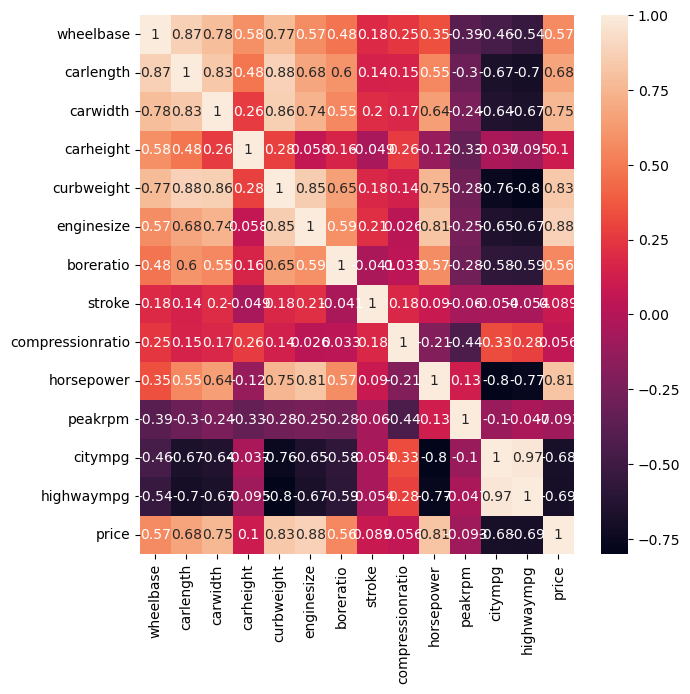

In [11]:
#a Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(7,7))
corrr=df.corr()
sns.heatmap(corrr,annot=True)

In [12]:
#printing x 
x

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
196,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28
197,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,...,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28
198,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22


<AxesSubplot:>

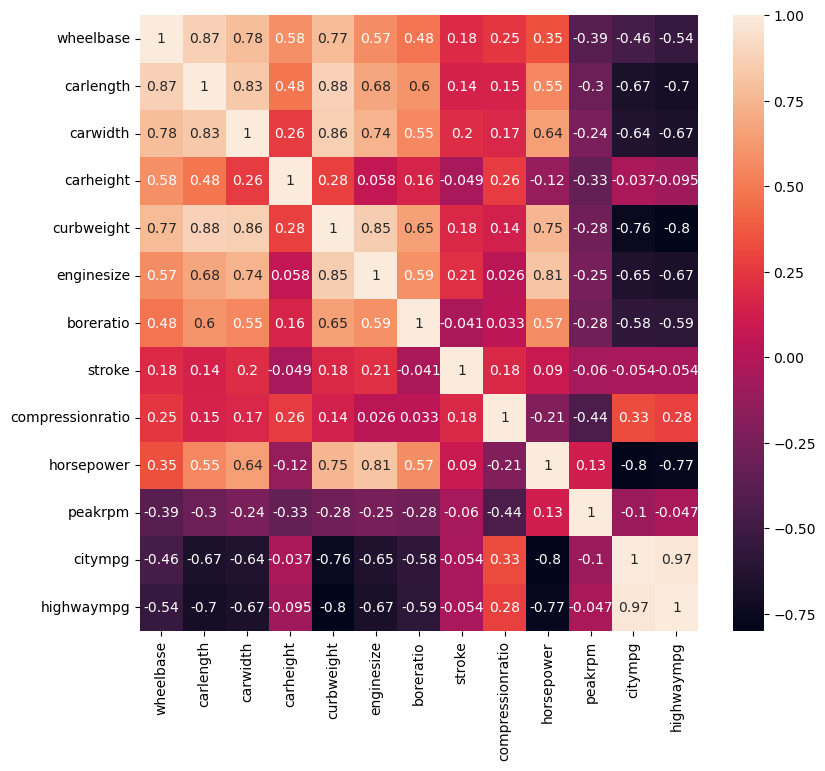

In [13]:
# displaying the correlation using heatmap 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,8))
cor=x.corr()   # finding the correlation of x dataset
sns.heatmap(cor,annot=True)

In [14]:
# with the following function we can select highly correlated features 
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset,threshold):
    col_corr=set() # Set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]  # getting the name of column
                col_corr.add(col_name)
                
    return col_corr

In [15]:
# here we call the function and pass the dataset and threshold value 
# len function calculates the total number of correlation features
correlation_features=correlation(x,0.7)
len(set(correlation_features))

6

In [16]:
correlation_features

{'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

In [17]:
# here we droping the correlation feature 
x.drop(correlation_features,axis=1,inplace=True)

In [18]:
# After dropping the values 
x

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg
0,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000,21
1,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000,21
2,gas,std,two,hatchback,rwd,front,94.5,52.4,ohcv,six,mpfi,2.68,3.47,9.0,5000,19
3,gas,std,four,sedan,fwd,front,99.8,54.3,ohc,four,mpfi,3.19,3.40,10.0,5500,24
4,gas,std,four,sedan,4wd,front,99.4,54.3,ohc,five,mpfi,3.19,3.40,8.0,5500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,gas,std,four,wagon,rwd,front,104.3,57.5,ohc,four,mpfi,3.78,3.15,9.5,5400,23
196,gas,std,four,sedan,rwd,front,104.3,56.2,ohc,four,mpfi,3.78,3.15,9.5,5400,24
197,gas,std,four,wagon,rwd,front,104.3,57.5,ohc,four,mpfi,3.78,3.15,9.5,5400,24
198,gas,turbo,four,sedan,rwd,front,104.3,56.2,ohc,four,mpfi,3.62,3.15,7.5,5100,17


In [19]:
print('fuel type:',x['fueltype'].unique())
print('aspiration :',x['aspiration'].unique())
print('doornumber :',x['doornumber'].unique())
print('carbody :',x['carbody'].unique())
print('drivewheel :',x['drivewheel'].unique())
print('enginelocation :',x['enginelocation'].unique())
print('enginetype :',x['enginetype'].unique())
print('cylindernumber :',x['cylindernumber'].unique())
print('fuelsystem :',x['fuelsystem'].unique())



fuel type: ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          200 non-null    object 
 1   aspiration        200 non-null    object 
 2   doornumber        200 non-null    object 
 3   carbody           200 non-null    object 
 4   drivewheel        200 non-null    object 
 5   enginelocation    200 non-null    object 
 6   wheelbase         200 non-null    float64
 7   carheight         200 non-null    float64
 8   enginetype        200 non-null    object 
 9   cylindernumber    200 non-null    object 
 10  fuelsystem        200 non-null    object 
 11  boreratio         200 non-null    float64
 12  stroke            200 non-null    float64
 13  compressionratio  200 non-null    float64
 14  peakrpm           200 non-null    int64  
 15  citympg           200 non-null    int64  
dtypes: float64(5), int64(2), object(9)
memory us

In [21]:
# Here we done encoding for  categorical features using get dummies method 
encode = pd.get_dummies(x, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],drop_first=True)

In [22]:
# new dataframe after encoding 
encode

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,48.8,3.47,2.68,9.0,5000,21,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,48.8,3.47,2.68,9.0,5000,21,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,52.4,2.68,3.47,9.0,5000,19,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,99.8,54.3,3.19,3.40,10.0,5500,24,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,54.3,3.19,3.40,8.0,5500,18,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,104.3,57.5,3.78,3.15,9.5,5400,23,1,0,0,...,0,0,0,0,0,0,0,1,0,0
196,104.3,56.2,3.78,3.15,9.5,5400,24,1,0,0,...,0,0,0,0,0,0,0,1,0,0
197,104.3,57.5,3.78,3.15,9.5,5400,24,1,0,0,...,0,0,0,0,0,0,0,1,0,0
198,104.3,56.2,3.62,3.15,7.5,5100,17,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# here we done scaling on each features to get the values in same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
encode.iloc[:,:] = sc.fit_transform(encode.iloc[:,:])
encode

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.691398,-1.990885,0.550689,-1.834971,-0.281409,-0.252873,-0.659791,0.323994,-0.452570,1.105542,...,-0.070888,-0.070888,-0.142857,-0.70181,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
1,-1.691398,-1.990885,0.550689,-1.834971,-0.281409,-0.252873,-0.659791,0.323994,-0.452570,1.105542,...,-0.070888,-0.070888,-0.142857,-0.70181,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
2,-0.683189,-0.522350,-2.415857,0.672167,-0.281409,-0.252873,-0.964897,0.323994,-0.452570,1.105542,...,-0.070888,-0.070888,-0.142857,-0.70181,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
3,0.222489,0.252710,-0.500745,0.450015,-0.025257,0.789901,-0.202133,0.323994,-0.452570,-0.904534,...,-0.070888,-0.070888,-0.142857,-0.70181,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
4,0.154136,0.252710,-0.500745,0.450015,-0.537562,0.789901,-1.117450,0.323994,-0.452570,-0.904534,...,-0.070888,-0.070888,-0.142857,-0.70181,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.991462,1.558075,1.714776,-0.343383,-0.153333,0.581346,-0.354686,0.323994,-0.452570,-0.904534,...,-0.070888,-0.070888,-0.142857,-0.70181,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
196,0.991462,1.027771,1.714776,-0.343383,-0.153333,0.581346,-0.202133,0.323994,-0.452570,-0.904534,...,-0.070888,-0.070888,-0.142857,-0.70181,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
197,0.991462,1.558075,1.714776,-0.343383,-0.153333,0.581346,-0.202133,0.323994,-0.452570,-0.904534,...,-0.070888,-0.070888,-0.142857,-0.70181,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888
198,0.991462,1.027771,1.113957,-0.343383,-0.665638,-0.044318,-1.270003,0.323994,2.209605,-0.904534,...,-0.070888,-0.070888,-0.142857,-0.70181,-0.123404,-0.323994,-0.070888,1.105542,-0.217072,-0.070888


# Not used 
#applying onehotencoder on catagorical features , drop = 'first', used to avoid multicollinearity 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer (transformers=[('R1',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,8,9,10])],remainder='passthrough')
x=ct.fit_transform(x)
x.shape

#after applying the encoding 
x

In [24]:
# converting the values of y in numpy array 
y=y.values


In [25]:
# here encode contains indepedent features and
# y contains dependent column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encode,y,test_size=0.2,random_state=15)


In [26]:
# LINEAR REGRESSION 
from sklearn.linear_model import LinearRegression
r1=LinearRegression()
r1.fit(x_train,y_train) # here we train our model using traning dataset 

LinearRegression()

In [27]:
y_pred=r1.predict(x_test) # using our regression model we predict the predicted values using testing dataset 
y_pred

array([35932.74585983, 18009.76978906, 23930.99038267, 16853.94227635,
       32369.90950908,  9639.52450287, -2393.64319122, 12320.37118158,
        7144.77192273, 11395.        , 10444.44982657, 39616.30516888,
        5862.07906196,  7376.93528182, 22365.72659397,  6872.11824456,
       22894.88334511, 10855.31394635,  7622.9417597 , 20681.82134218,
       17245.09575281,  5954.40727805, 10855.31394635, 16197.92366779,
        8916.27180196,  8433.31798315,  8537.38151156, 19766.21138858,
        6217.48405658,  5326.06990771,  6891.04301145,  7645.22288173,
       12146.4242624 , 40601.12582579,  6367.58450172,  7129.59364472,
       11108.53383299, 14831.39319936,  5920.88485421, 16795.24658166])

In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score
# here r2_score tells us the performance of our model  

0.8285650454048934

In [29]:
from sklearn import metrics
#MAE
print("MAE=",metrics.mean_absolute_error(y_test,y_pred))
#MSE
print("MSE=",metrics.mean_squared_error(y_test,y_pred))
#RMSE
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE= 2409.8061991394125
MSE= 11734229.776757434
RMSE= 3425.526204360059


In [30]:
# pickle module
import dill
file="ML1" # creating a file ML1 
fileobj=open(file,'wb') # here we open the file write mode 
dill.dump(r1,fileobj) # Now here we dump our linear regression model (r1) into file (ML1)
fileobj.close() 

# prediction on new dataset 

# Predicting the price of car using previously trained model 

In [31]:
# this is a new dataset on which we check our previous trained model (r1)
df1=pd.read_excel('CarPrice1.xlsx')
df2=df1.copy()
df1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
1,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
2,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
3,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27
4,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25


In [32]:
# droping unnecessary features 
df1.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)
df1

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
2,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
3,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27
4,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25


In [33]:
# here we drop the correlated featues 
df1.drop(correlation_features,axis=1,inplace=True)
df1

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg
0,gas,std,four,sedan,rwd,front,109.1,55.5,ohc,four,mpfi,3.78,3.15,9.5,5400,23
1,gas,turbo,four,sedan,rwd,front,109.1,55.5,ohc,four,mpfi,3.78,3.15,8.7,5300,19
2,gas,std,four,sedan,rwd,front,109.1,55.5,ohcv,six,mpfi,3.58,2.87,8.8,5500,18
3,diesel,turbo,four,sedan,rwd,front,109.1,55.5,ohc,six,idi,3.01,3.40,23.0,4800,26
4,gas,turbo,four,sedan,rwd,front,109.1,55.5,ohc,four,mpfi,3.78,3.15,9.5,5400,19


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          5 non-null      object 
 1   aspiration        5 non-null      object 
 2   doornumber        5 non-null      object 
 3   carbody           5 non-null      object 
 4   drivewheel        5 non-null      object 
 5   enginelocation    5 non-null      object 
 6   wheelbase         5 non-null      float64
 7   carheight         5 non-null      float64
 8   enginetype        5 non-null      object 
 9   cylindernumber    5 non-null      object 
 10  fuelsystem        5 non-null      object 
 11  boreratio         5 non-null      float64
 12  stroke            5 non-null      float64
 13  compressionratio  5 non-null      float64
 14  peakrpm           5 non-null      int64  
 15  citympg           5 non-null      int64  
dtypes: float64(5), int64(2), object(9)
memory usage:

In [35]:
df1.shape

(5, 16)

In [36]:
# Encoding 
# The label parameter = encode.columns, which is a list of column names from historic  DataFrame called encode. 
# This means that the columns of the new DataFrame(df_newdata) will be in the same order as the columns of the encode DataFrame.
df_newdata = df1.reindex(labels=encode.columns,axis=1)
df_newdata

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,109.1,55.5,3.78,3.15,9.5,5400,23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109.1,55.5,3.78,3.15,8.7,5300,19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109.1,55.5,3.58,2.87,8.8,5500,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109.1,55.5,3.01,3.40,23.0,4800,26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109.1,55.5,3.78,3.15,9.5,5400,19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Now to replace null values with 0 
df_newdata.fillna(0,inplace=True)
df_newdata

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,109.1,55.5,3.78,3.15,9.5,5400,23,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.1,55.5,3.78,3.15,8.7,5300,19,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109.1,55.5,3.58,2.87,8.8,5500,18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109.1,55.5,3.01,3.40,23.0,4800,26,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109.1,55.5,3.78,3.15,9.5,5400,19,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# After encoding , we done scaling on each features to get the values in same range 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_newdata.iloc[:,:] = sc.fit_transform(df_newdata.iloc[:,:])
df_newdata

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,fueltype_gas,aspiration_turbo,doornumber_two,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.0,0.0,0.650494,0.035765,-0.431638,0.483494,0.659380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.650494,0.035765,-0.575517,0.080582,-0.659380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-0.020118,-1.633269,-0.557532,0.886405,-0.989071,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-1.931364,1.525974,1.996325,-1.933975,1.648451,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.650494,0.035765,-0.431638,0.483494,-0.659380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# NOTE :- Your new data should have the same exact columns as the data that you used to train and persist your original model. 

# Actual price of car
16845
19045
21485
22470
22625


In [39]:
# here using pickle module or using historic  linear reg model, we predict the price the of the car . 
load_file=dill.load(open('ML1','rb'))
print("Price predicted by our model :-->",load_file.predict(df_newdata))
# predicted price of a car by previously  trained model

Price predicted by our model :--> [16649.25508077 18717.13423966 20484.67883244 -9015.54016833
 18288.89668282]


In [40]:
# adding predicted price as a col with df2 (orignal dataframe )
df2['Price pred by model'] = load_file.predict(df_newdata)

In [41]:
df2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Price pred by model
0,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16649.255081
1,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,18717.134240
2,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,20484.678832
3,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,-9015.540168
4,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,18288.896683


# Compare linear regression and decision tree using historic dataset

In [42]:
# DECISION TREE 
from sklearn.tree import DecisionTreeRegressor

In [88]:
dec_model=DecisionTreeRegressor(max_depth=10,random_state=43)

In [89]:
dec_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=43)

In [90]:
# values predicted by decison tree model 
dec_pred=dec_model.predict(x_test)
dec_pred

array([31600. , 15250. , 21105. ,  9044. , 32528. ,  8845. ,  6295. ,
        9044. ,  7126. , 11395. , 12290. , 19699. ,  6295. ,  7126. ,
       15998. ,  6692. , 17450. , 13177.5,  7142. , 18950. , 16925. ,
        7142. , 13177.5, 15580. ,  9538. ,  8238. , 11694. , 18344. ,
        6229. ,  5480.5,  6399. ,  8345. , 18620. , 19699. ,  7603. ,
       17199. ,  7142. , 15050. ,  7948.5, 17199. ])

In [91]:
# values predicted by linear regression  model 
y_pred=r1.predict(x_test)
y_pred

array([35932.74585983, 18009.76978906, 23930.99038267, 16853.94227635,
       32369.90950908,  9639.52450287, -2393.64319122, 12320.37118158,
        7144.77192273, 11395.        , 10444.44982657, 39616.30516888,
        5862.07906196,  7376.93528182, 22365.72659397,  6872.11824456,
       22894.88334511, 10855.31394635,  7622.9417597 , 20681.82134218,
       17245.09575281,  5954.40727805, 10855.31394635, 16197.92366779,
        8916.27180196,  8433.31798315,  8537.38151156, 19766.21138858,
        6217.48405658,  5326.06990771,  6891.04301145,  7645.22288173,
       12146.4242624 , 40601.12582579,  6367.58450172,  7129.59364472,
       11108.53383299, 14831.39319936,  5920.88485421, 16795.24658166])

In [92]:
# r2 score for linear regression model
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score 

0.8285650454048934

In [93]:
# r2 score for decison tree
score1=r2_score(y_test,dec_pred)
score1

0.7806034814789947

feature_cols=encode.columns
from sklearn import tree
fig=plt.figure(figsize=(25,25))
z=tree.plot_tree(dec_model,feature_names=feature_cols,filled=True)

In [110]:
# so if we compare r2 score of linear regression model with decision tree regressor model, LR IS BETTER than DECISION TREE . 
# we can see that linear regression explains  r2 score of 82% means that the model is able to explain 82% of the variance 
# in the dependent variable (the target variable being predicted) 
# using the independent variables (the features used for prediction) in the model. 

In [111]:
# MAE , MSE , RMSE For LINEAR REGRESSION 
from sklearn import metrics
#MAE
print("MAE=",metrics.mean_absolute_error(y_test,y_pred))
#MSE
print("MSE=",metrics.mean_squared_error(y_test,y_pred))
#RMSE
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE= 2409.8061991394125
MSE= 11734229.776757434
RMSE= 3425.526204360059


In [112]:
# MAE, MSE , RMSE For DECISION TREE 
print(" MAE : ",metrics.mean_absolute_error(y_test,dec_pred))
print(" MSE : ",metrics.mean_squared_error(y_test,dec_pred))
print(" RMSE : ",np.sqrt(metrics.mean_squared_error(y_test,dec_pred)))

 MAE :  1975.129175
 MSE :  15017060.940847224
 RMSE :  3875.1852782605406


In [113]:
# Overall linear model is better than decision treee model for this prediction . 

# CHECKING WITH RANDOM FOREST 

In [114]:
# checking with random forest 
from sklearn.ensemble import RandomForestRegressor

In [115]:
ran_model=RandomForestRegressor(n_estimators=16,max_depth=4,random_state=43)

In [116]:
ran_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=16, random_state=43)

In [117]:
ran_pred=ran_model.predict(x_test)
ran_pred

array([34909.7220219 , 16243.06924243, 21235.407374  ,  9991.82671437,
       32577.75545635,  9327.79658544,  6767.0118781 ,  9991.82671437,
        7933.54658351, 14200.22576868, 10307.1882447 , 25629.15436959,
        7045.35196268,  9003.26513835, 22991.05714737,  7000.91612869,
       25339.84985119, 15366.81905339,  7731.37150414, 19600.46461025,
       16832.15690252,  7731.37150414, 15366.81905339, 15366.81905339,
        9303.68454919,  8489.62947349,  9658.18724836, 15745.51717038,
        6767.0118781 ,  6767.0118781 ,  7279.25621327,  9781.90031535,
       16852.97079141, 26578.8186553 ,  9450.727679  , 14932.97661111,
        9191.75108651, 15744.26111427,  7279.25621327, 14763.16733531])

In [118]:
score2=r2_score(y_pred,ran_pred)
score2

0.8016599993624662